In [1]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Graph:
    def __init__(self, n):
        self.n = n
        self.adjmat = []
        
        for i in range(n):
            self.adjmat.append([0 for j in range(n)])
    
    def addedge(self, u, v):
        self.adjmat[u][v] = 1
        
    def visualize(self):
        g = nx.from_numpy_matrix(np.matrix(self.adjmat), create_using=nx.DiGraph())
        nx.draw(g, with_labels=True, node_size=500, alpha=0.9)

In [3]:
def topologicalsort(graph):
    topsort = []
    visited = [0 for i in range(graph.n)]
    
    for i in range(graph.n):
        if visited[i] == 0:
            visited[i] = 1
            traversal = bfs(graph, i, visited)
            topsort.extend(traversal)
    
    while topsort:
        print(f"{topsort.pop()} ", end="")
    
def bfs(graph, v, visited):
    traversal = []
    q = deque()
    q.append(v)
    
    while q:
        v = q.popleft()
        
        for i in range(graph.n):
            if graph.adjmat[v][i] == 1 and visited[i] == 0:
                visited[i] = 1
                q.append(i)
        
        traversal.append(v)
    
    traversal.reverse()
    
    return traversal

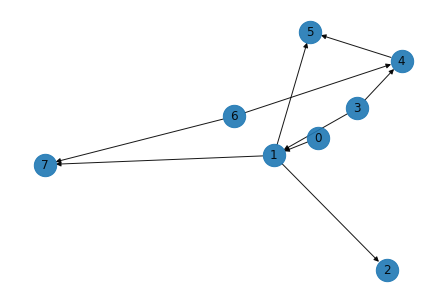

In [4]:
edges = [(0,1), (1,2), (1,5), (1,7), (3,1), (3,4), (4,5), (6,4), (6,7)]

g = Graph(8)
for i, j in edges:
    g.addedge(i, j)
    
g.visualize()

In [5]:
topologicalsort(g)

6 3 4 0 1 2 5 7 

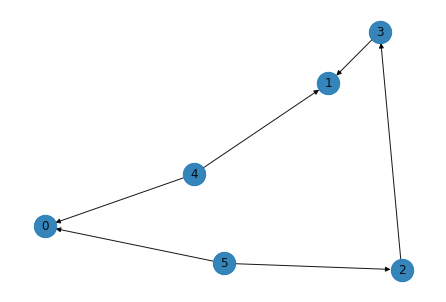

In [8]:
edges = [(5,0), (5,2), (4,0), (4,1), (2,3), (3,1)]

g = Graph(6)
for i, j in edges:
    g.addedge(i, j)
    
g.visualize()

In [7]:
topologicalsort(g)

5 4 2 3 1 0 